<a href="https://colab.research.google.com/github/ntrphanikumar/nl2sql/blob/main/vanna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing and importing all the necessary libraries

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
pip install requests sqlalchemy


In [ ]:
from sqlalchemy import create_engine


## For the below cell to run we need requirements.txt in the directory

In [ ]:
pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00


## As this is a google collab we don't have an enviornment to run so we can also use ngrok library to display output

In [ ]:
!pip install streamlit ngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.8 MB/s eta 0:00:00


## Code for generating SQL queries

In [ ]:
%%writefile app.py


import streamlit as st

from vanna.remote import VannaDefault

@st.cache_resource(ttl=3600)
def setup_vanna():
    vn = VannaDefault(api_key="16da3241422648438e030c87b9c2dc9a", model='chinook')
    vn.connect_to_sqlite("https://vanna.ai/Chinook.sqlite")
    return vn

@st.cache_data(show_spinner="Generating sample questions ...")
def generate_questions_cached():
    vn = setup_vanna()
    return vn.generate_questions()


@st.cache_data(show_spinner="Generating SQL query ...")
def generate_sql_cached(question: str):
    vn = setup_vanna()
    return vn.generate_sql(question=question, allow_llm_to_see_data=True)

@st.cache_data(show_spinner="Checking for valid SQL ...")
def is_sql_valid_cached(sql: str):
    vn = setup_vanna()
    return vn.is_sql_valid(sql=sql)

@st.cache_data(show_spinner="Running SQL query ...")
def run_sql_cached(sql: str):
    vn = setup_vanna()
    return vn.run_sql(sql=sql)

@st.cache_data(show_spinner="Checking if we should generate a chart ...")
def should_generate_chart_cached(question, sql, df):
    vn = setup_vanna()
    return vn.should_generate_chart(df=df)

@st.cache_data(show_spinner="Generating Plotly code ...")
def generate_plotly_code_cached(question, sql, df):
    vn = setup_vanna()
    code = vn.generate_plotly_code(question=question, sql=sql, df=df)
    return code


@st.cache_data(show_spinner="Running Plotly code ...")
def generate_plot_cached(code, df):
    vn = setup_vanna()
    return vn.get_plotly_figure(plotly_code=code, df=df)


@st.cache_data(show_spinner="Generating followup questions ...")
def generate_followup_cached(question, sql, df):
    vn = setup_vanna()
    return vn.generate_followup_questions(question=question, sql=sql, df=df)

@st.cache_data(show_spinner="Generating summary ...")
def generate_summary_cached(question, df):
    vn = setup_vanna()
    return vn.generate_summary(question=question, df=df)

Writing app.py


## Example how output will be displayed we can also modify it as per requirements

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import streamlit as st

@st.cache_data(show_spinner="Running SQL query ...")
def run_sql_cached(sql: str):
    vn = setup_vanna()
    return vn.run_sql(sql=sql)

def display_results(query):
    results = run_sql_cached(query)
    df = pd.DataFrame(results)
    display(df)

query_input = widgets.Text(
    value='',
    placeholder='Enter your query',
    description='Query:',
    disabled=False
)

submit_button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

submit_button.on_click(lambda x: display_results(query_input.value))

display(query_input, submit_button)


2024-06-25 04:33:40.362 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


Text(value='', description='Query:', placeholder='Enter your query')

Button(description='Submit', icon='check', style=ButtonStyle(), tooltip='Click me')

2024-06-25 04:33:52.614 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-25 04:33:52.621 No runtime found, using MemoryCacheStorageManager


NameError: name 'setup_vanna' is not defined

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INT

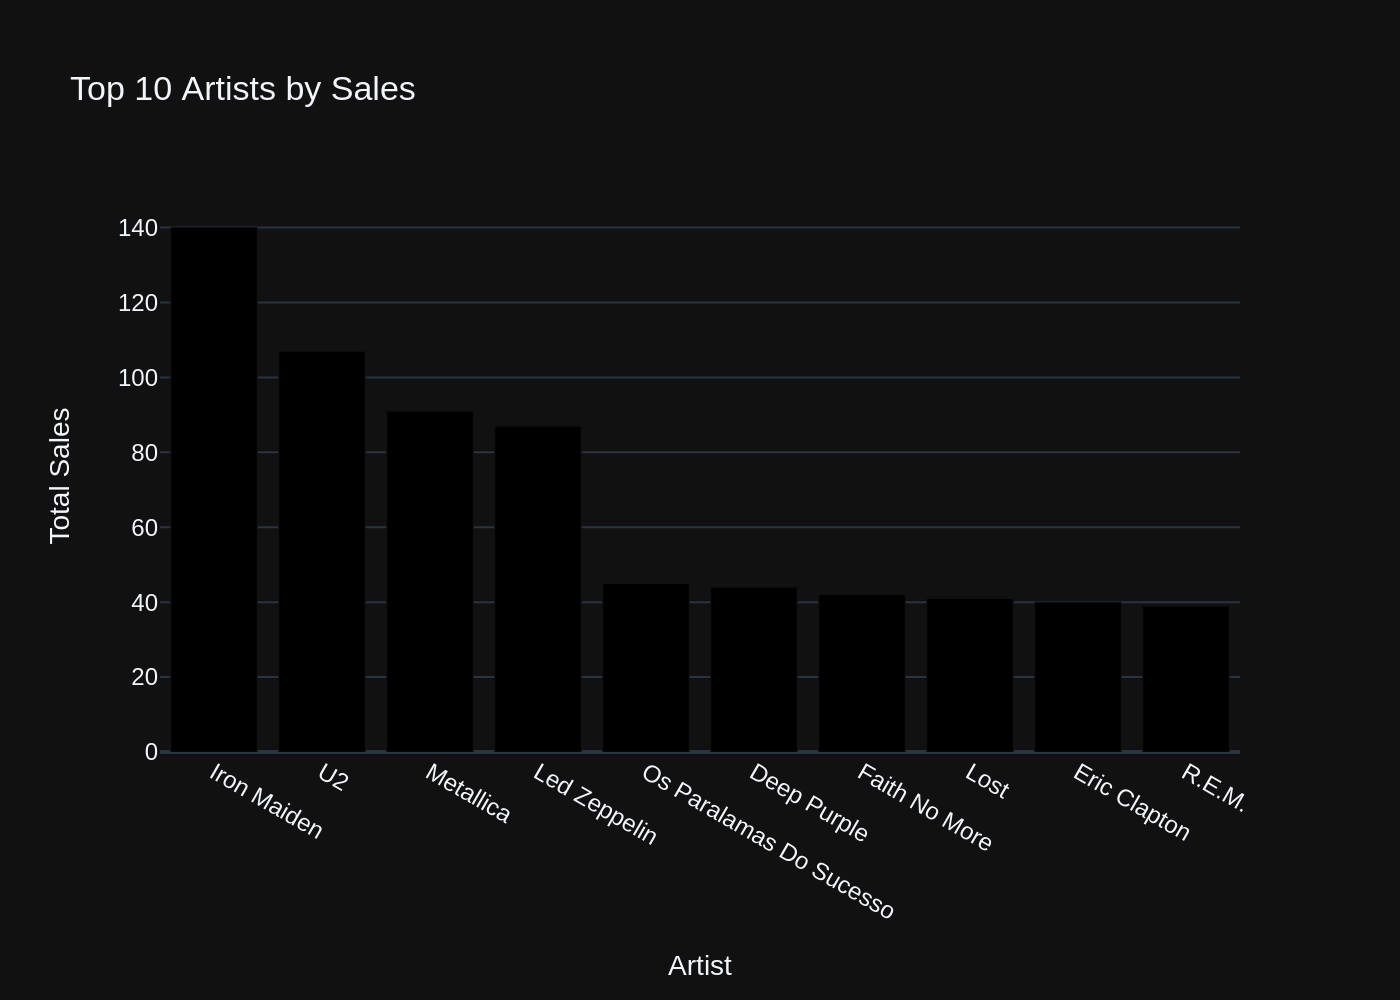

Google Colab doesn't support running websocket servers. Disabling debug mode.


<IPython.core.display.Javascript object>

Your app is running at:
https://8sa76r04eku-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off


In [ ]:
!pip install vanna
import vanna
from vanna.remote import VannaDefault
vn = VannaDefault(model='chinook', api_key="16da3241422648438e030c87b9c2dc9a")
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')
vn.ask('What are the top 10 artists by sales?')

from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

In [ ]:
print(vn)

In [ ]:
vanna.get_api_key('joshipriyal299@gmail.com')

Check your email for the code and enter it here: HCX8PU


'16da3241422648438e030c87b9c2dc9a'